<a href="https://colab.research.google.com/github/dkanh6/Machine_Learning_Examples/blob/main/scikit_learn_again.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import requests


# This is the kaggle dataset URL
url = 'https://raw.githubusercontent.com/dkanh6/Machine_Learning_Examples/main/Data/insurance.csv'


# Load the dataset and reduce feature set down to just two: "avg_salary" and "age"
data = pd.read_csv(url,header=0)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Segment the data based on smoking status
smokers = data[data['smoker'] == 'yes']
nonsmokers = data[data['smoker'] == 'no']

In [4]:
# Prepare the features (age & BMI) and the target variable 'charges' for smokers
X_smokers = smokers[['age','bmi']].values
y_smokers = smokers['charges'].values

# Prepare the features (age & BMI) and the target variable 'charges' for nonsmokers
X_nonsmokers = nonsmokers[['age','bmi']].values
y_nonsmokers = nonsmokers['charges'].values

In [5]:
from sklearn.model_selection import train_test_split

# Split data for training and testing
X_train_smokers, X_test_smokers, y_train_smokers, y_test_smokers = train_test_split(X_smokers,y_smokers, test_size=0.15)
X_train_nonsmokers, X_test_nonsmokers, y_train_nonsmokers, y_test_nonsmokers = train_test_split(X_nonsmokers,y_nonsmokers, test_size=0.15)
print('SMOKERS train:', len(X_train_smokers), 'test:', len(X_test_smokers))
print('NON Smokers train:', len(X_train_nonsmokers), 'test:', len(X_test_nonsmokers))

SMOKERS train: 232 test: 42
NON Smokers train: 904 test: 160


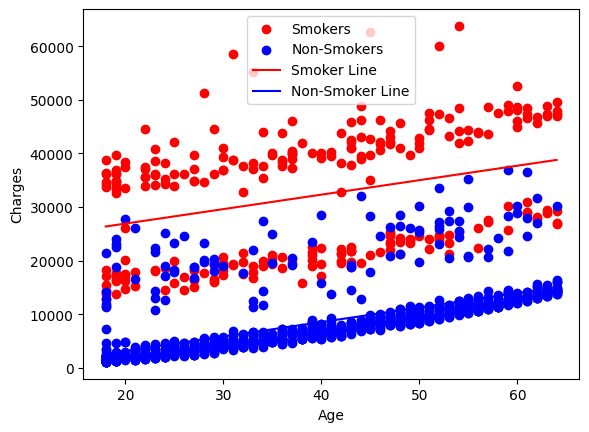

In [6]:
from sklearn.linear_model import LinearRegression

# Initalize both models
model_smokers = LinearRegression()
model_nonsmokers = LinearRegression()

# Fit the models
model_smokers.fit(X_train_smokers,y_train_smokers)
model_nonsmokers.fit(X_train_nonsmokers,y_train_nonsmokers)

# Predict the line
line_smokers = model_smokers.predict(X_smokers)
line_nonsmokers = model_nonsmokers.predict(X_nonsmokers)

# Plot the results
plt.scatter(X_smokers[:, 0], y_smokers, color='red', label='Smokers')
plt.scatter(X_nonsmokers[:, 0], y_nonsmokers, color='blue', label='Non-Smokers')

# We'll just plot against age for simplicity
ages = np.linspace(data['age'].min(), data['age'].max(), 100)
bmi_mean = data['bmi'].mean()
X_line = np.column_stack((ages, [bmi_mean]*100))

plt.plot(ages, model_smokers.predict(X_line), color='red', label='Smoker Line')
plt.plot(ages, model_nonsmokers.predict(X_line), color='blue', label='Non-Smoker Line')

plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()


